## Importing Libraries and dataset

In [104]:
# Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

In [105]:
# Importing dataset from file 
data_1_Uncleaned=pd.read_csv("../data/benin-malanville.csv")
data_2_Uncleaned=pd.read_csv("../data/sierraleone-bumbuna.csv")
data_3_Uncleaned=pd.read_csv("../data/togo-dapaong_qc.csv")

## Data Cleaning

In [106]:
# Cleaning of data
data_1 = data_1_Uncleaned.dropna(axis=1, how='all')
data_2 = data_2_Uncleaned.dropna(axis=1, how='all')
data_3 = data_3_Uncleaned.dropna(axis=1, how='all')

## Data Quality Check


In [107]:
# Checking for a missing value
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
missing_value = name_of_data.isnull().sum()
print("Missing Values in the data are:\n", missing_value)

Missing Values in the data are:
 Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [108]:
# Checking for a negative value
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
negative_value = name_of_data[(name_of_data['GHI'] < 0) | (name_of_data['DNI'] < 0) | (name_of_data['DHI'] < 0)]
print("Negative values in the data are:\n", negative_value)

Negative values in the data are:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

     

## General statistics analysis of datasets

In [109]:
# Display the general summary statistics of dataset
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
name_of_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


## Temperature Analysis

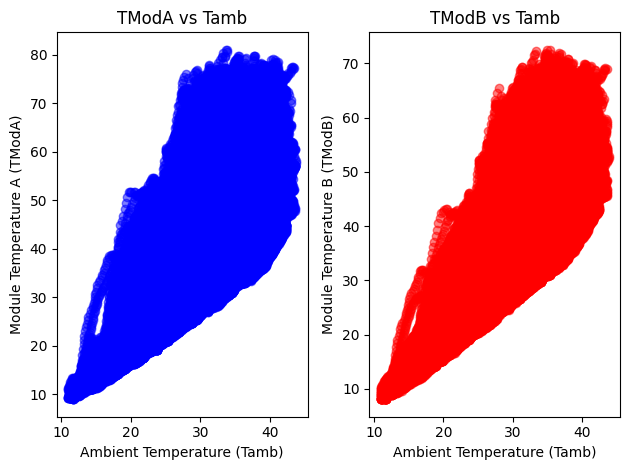

In [110]:
# Display Temperature Analysis
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]

plt.subplot(1, 2, 1)
plt.scatter(name_of_data['Tamb'], name_of_data['TModA'], color='blue', alpha=0.5)
plt.title('TModA vs Tamb')
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Module Temperature A (TModA)')


plt.subplot(1, 2, 2)
plt.scatter(name_of_data['Tamb'], name_of_data['TModB'], color='red', alpha=0.5)
plt.title('TModB vs Tamb')
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Module Temperature B (TModB)')

plt.tight_layout()
plt.show()

## Correlation Analysis

In [111]:
# Display Correlation Analysis
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
correlation_of_TModA = name_of_data['Tamb'].corr(name_of_data['TModA'])
correlation_of_TModB = name_of_data['Tamb'].corr(name_of_data['TModB'])

print(f"Correlation coefficient between Tamb and TModA: {round(correlation_of_TModA, 4)}")
print(f"Correlation coefficient between Tamb and TModB: {round(correlation_of_TModB, 4)}")

Correlation coefficient between Tamb and TModA: 0.7617
Correlation coefficient between Tamb and TModB: 0.8234


# Time Series Analysis

C:\Users\Eyobe\AppData\Local\Temp\ipykernel_8012\3885231564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_of_data ['Timestamp'] = pd.to_datetime(name_of_data['Timestamp'])


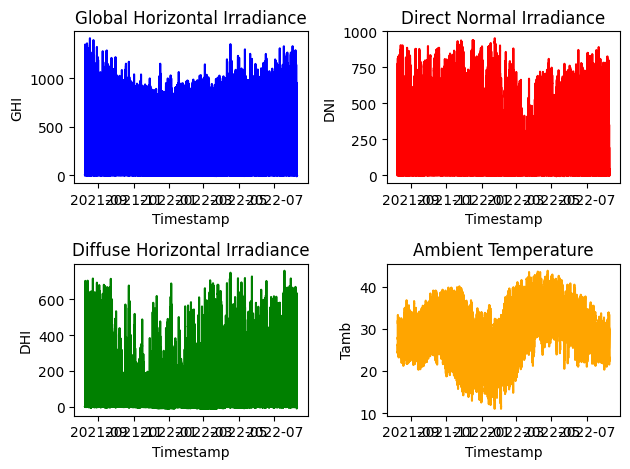

In [112]:
# Display Temperature Analysis
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]

name_of_data ['Timestamp'] = pd.to_datetime(name_of_data['Timestamp'])
name_of_data.set_index('Timestamp', inplace=True)

plt.subplot(2, 2, 1)
plt.plot(name_of_data['GHI'], color='blue')
plt.title('Global Horizontal Irradiance')
plt.xlabel('Timestamp')
plt.ylabel('GHI')

plt.subplot(2, 2, 2)
plt.plot(name_of_data['DNI'], color='red')
plt.title('Direct Normal Irradiance')
plt.xlabel('Timestamp')
plt.ylabel('DNI')


plt.subplot(2, 2, 3)
plt.plot(name_of_data['DHI'], color='green')
plt.title('Diffuse Horizontal Irradiance')
plt.xlabel('Timestamp')
plt.ylabel('DHI')

plt.subplot(2, 2, 4)
plt.plot(name_of_data['Tamb'], color='orange')
plt.title('Ambient Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Tamb')

plt.tight_layout()
plt.show()

# Wind Analysis

C:\Users\Eyobe\AppData\Local\Temp\ipykernel_8012\184572355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_of_data['Timestamp'] = pd.to_datetime(name_of_data['Timestamp'])


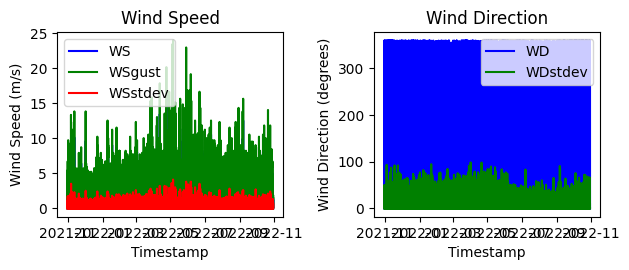

In [116]:
# Display Wind Analysis
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]

name_of_data['Timestamp'] = pd.to_datetime(name_of_data['Timestamp'])
name_of_data.set_index('Timestamp', inplace=True)


plt.subplot(2, 2, 1)
plt.plot(name_of_data['WS'], color='blue', label='WS')
plt.plot(name_of_data['WSgust'], color='green', label='WSgust')
plt.plot(name_of_data['WSstdev'], color='red', label='WSstdev')
plt.title('Wind Speed')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(name_of_data['WD'], color='blue', label='WD')
plt.plot(name_of_data['WDstdev'], color='green', label='WDstdev')
plt.title('Wind Direction')
plt.xlabel('Timestamp')
plt.ylabel('Wind Direction (degrees)')
plt.legend()


plt.tight_layout()
plt.show()

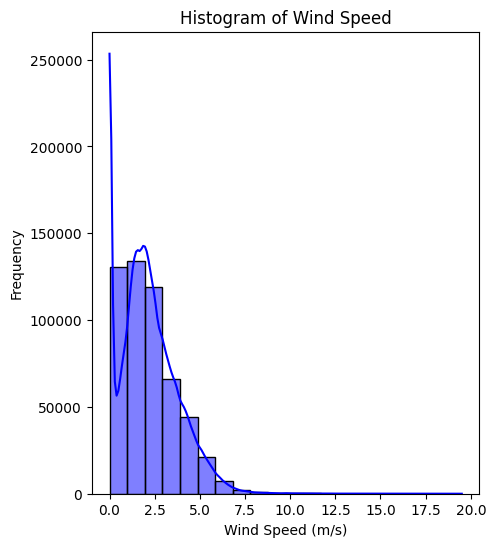

In [117]:
# Display Histogram of Wind Speed
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]

plt.figure(figsize=(5, 6))
sns.histplot(name_of_data['WS'], bins=20, kde=True, color='blue')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x1000 with 0 Axes>

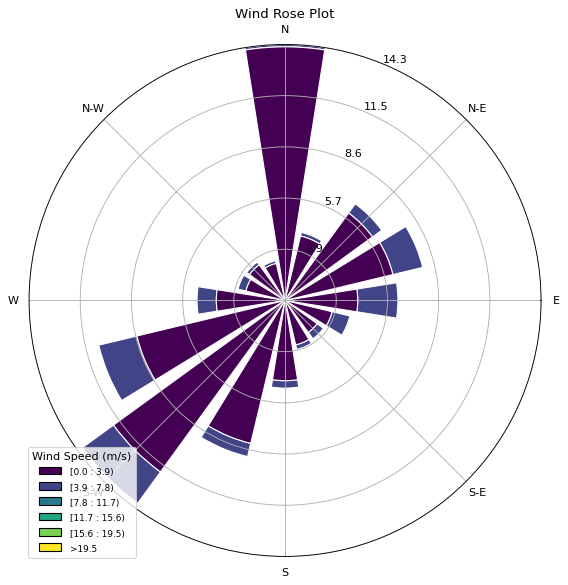

In [118]:
# Display Wind Speed
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]

plt.figure(figsize=(10, 10))
ax = WindroseAxes.from_ax()
ax.bar(name_of_data['WD'], name_of_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose Plot')
plt.show()

## Plotting

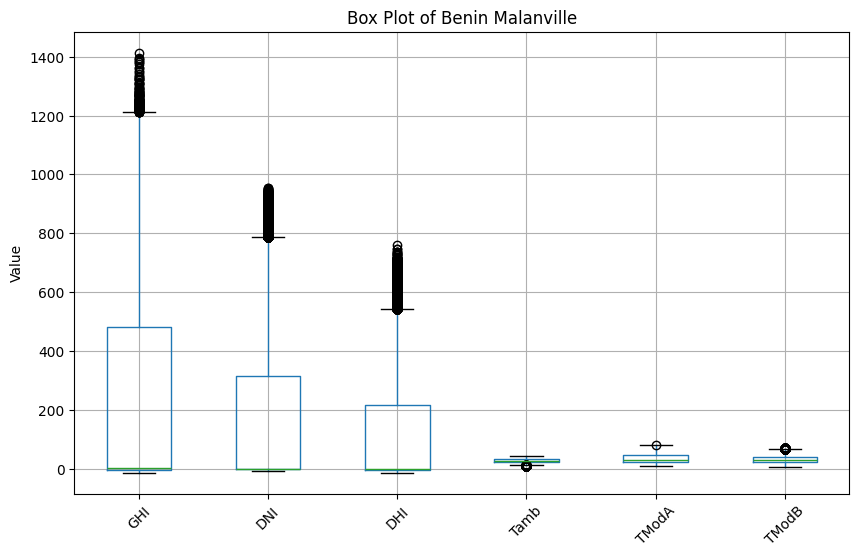

In [119]:
#Display Box Plot of a dataset
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
target_columns_to_look_1 = ['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB']
plt.figure(figsize=(10, 6))
name_of_data[target_columns_to_look_1].boxplot()
plt.title('Box Plot of Benin Malanville')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Frequency')

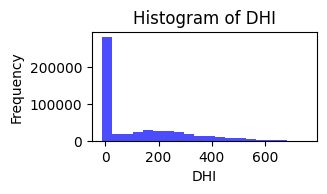

In [120]:
# Display Histograms of a dataset
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_colmun = input("Which colmun of data do you want to display: ")
name_of_data  = locals()[name_of_data]
plt.subplot(3, 2, 1)
plt.hist(name_of_data[name_of_colmun], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of '+ name_of_colmun)
plt.xlabel(name_of_colmun)
plt.ylabel('Frequency')

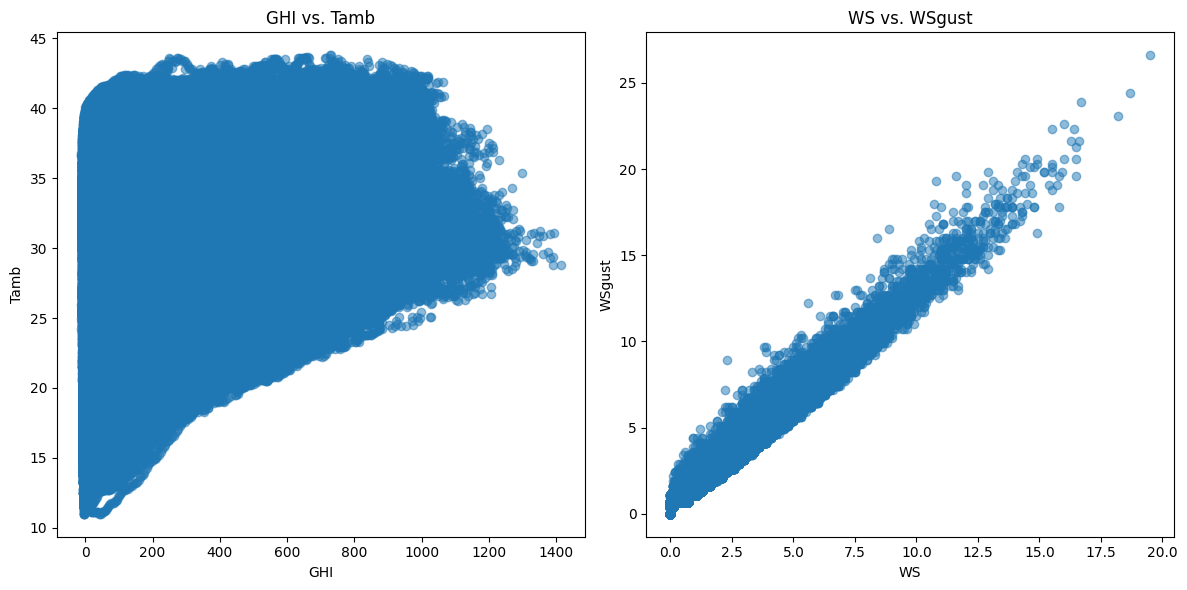

In [121]:
# Display Scatterplots of a dataset
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
scatter_plot= [('GHI', 'Tamb'), ('WS', 'WSgust')]
plt.figure(figsize=(12, 6))
for i, pair in enumerate(scatter_plot, start=1):
    plt.subplot(1, len(scatter_plot), i)
    plt.scatter(name_of_data[pair[0]], name_of_data[pair[1]], alpha=0.5)
    plt.title(f'{pair[0]} vs. {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
plt.tight_layout()